# Load the ppca backend

In [2]:
from palaeopca.P1Backend.P1Backend import P1Backend

ModuleNotFoundError: No module named 'palaeopca'

In [4]:
import palaeopca

ModuleNotFoundError: No module named 'palaeopca'

# Load some test data

In [6]:
p = P1Backend()
p.load_file("./testdata/testdata.csv", sep = ",", skip_header = 1, volume = 7, units_in = "emu", units_out = "Am2")

# P1DataObject

You can check the loaded data with the get_data() function

In [13]:
data = p.get_data()
print(data)

The P1DataObject is the data container that provides some functions to retrieve the underlying data.

get_samples() will return a list of the individual samples.

get_steps() will return a list of AF steps.

get_data(sample) will return the (x, y, z) data of the given sample.

In [18]:
print(data.get_samples())

[ 13.   15.5  18.   46.5  84.  128.  151. ]


In [19]:
print(data.get_steps())

[  0.   5.  10.  15.  20.  25.  30.  35.  40.  45.  50.  60.  70.  80.
  90. 100.]


In [20]:
print(data.get_data(13))

[[-6.23457e-08 -3.88326e-08  2.03272e-07]
 [-1.29967e-08 -1.85743e-08  1.89755e-07]
 [-6.11478e-09 -1.74341e-08  1.74388e-07]
 [-4.26081e-09 -1.63178e-08  1.59918e-07]
 [-3.12949e-09 -1.53858e-08  1.47329e-07]
 [-2.47136e-09 -1.38461e-08  1.33985e-07]
 [-1.67534e-09 -1.16227e-08  1.20690e-07]
 [-9.73984e-10 -1.08127e-08  1.08339e-07]
 [-9.47996e-10 -9.61046e-09  9.89454e-08]
 [-4.82783e-10 -8.92525e-09  8.78350e-08]
 [ 3.74908e-11 -7.86036e-09  7.73703e-08]
 [-5.80359e-11 -6.76305e-09  6.05830e-08]
 [ 7.96166e-10 -5.53829e-09  4.70567e-08]
 [ 1.20917e-09 -4.09933e-09  3.76060e-08]
 [ 1.40469e-09 -3.94949e-09  2.91950e-08]
 [ 1.25841e-09 -3.26877e-09  2.23781e-08]]


# PCA functions

The backend provides 3 functions to run PCA's

## Single interval PCA

To run a pca on the data in a given interval, use the run_single_interval() command.

It returns a numpy array with the following columns: SampleID/Depth, Inclination, Declination, MADp, MADo, Min step, Max step

In [21]:
pca_single = p.run_single_interval(min_step = 20, max_step = 60, NRM_unit = "A/m")

In [23]:
print(pca_single)

[[ 1.30000000e+01  3.08764698e-02  8.39093089e+01  6.93416584e+01
   9.90875303e-01  3.14576746e-01  2.00000000e+01  6.00000000e+01]
 [ 1.55000000e+01  2.96707993e-02  8.44334494e+01  7.49871977e+01
   7.47152676e-01  3.18451506e-01  2.00000000e+01  6.00000000e+01]
 [ 1.80000000e+01  3.06541600e-02  8.34061459e+01  4.80444346e+01
   4.16134167e-01  2.46295054e-01  2.00000000e+01  6.00000000e+01]
 [ 4.65000000e+01  2.80361022e-02  8.82121608e+01  3.48167318e+02
   8.63970531e-01  5.76314984e-01  2.00000000e+01  6.00000000e+01]
 [ 8.40000000e+01  2.76185015e-02  8.77856661e+01  1.74018697e+01
   9.89161937e-01  5.27536199e-01  2.00000000e+01  6.00000000e+01]
 [ 1.28000000e+02  3.08918877e-02  7.51800391e+01  3.56857259e+02
   1.81403323e+00  9.42062130e-01  2.00000000e+01  6.00000000e+01]
 [ 1.51000000e+02  2.28039302e-02 -4.71963486e+01  1.72899792e+01
   8.28812237e+00  1.65621441e+00  2.00000000e+01  6.00000000e+01]]


The results can be passed to a plotting function to generate plots. To generate zijderveld plots, use zijder_save, to generate sequence (downcore) plots, use sequence_plot. Lets create zijderveld plots with the pca results marked.

In [24]:
from ppca.P1Mpl.P1Zijder import zijder_save

In [25]:
# This function might ask you to install some latex-extension, if so, install them
zijder_save(
    "./testdata/zijderveld",
    p.get_data(),
    format = "png",
    pca_results = pca_single,
    pca_steps = p.get_data().get_steps(),
    pca_anno = True,
    pca_points = True,
    pca_lines = True
)

## Best fit PCA

The run_best_fit() function follows the same syntax as the run_single_interval() function.

## PCA Mesh

The run_mesh() function will calculate moving window pca and return the results. Lets load a different dataset first.

In [30]:
p.load_file("./testdata/13PC_NRM.csv", sep = ",", skip_header = 1, volume = 7, units_in = "emu", units_out = "Am2")

In [35]:
pca_mesh = p.run_mesh(window = 5)

In [36]:
print(pca_mesh)

{'Samples': array([  1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,  11.,
        12.,  13.,  14.,  15.,  16.,  17.,  18.,  19.,  20.,  21.,  22.,
        23.,  24.,  25.,  26.,  27.,  28.,  29.,  30.,  31.,  32.,  33.,
        34.,  35.,  36.,  37.,  38.,  39.,  40.,  41.,  42.,  43.,  44.,
        45.,  46.,  47.,  48.,  49.,  50.,  51.,  52.,  53.,  54.,  55.,
        56.,  57.,  58.,  59.,  60.,  61.,  62.,  63.,  64.,  65.,  66.,
        67.,  68.,  69.,  70.,  71.,  72.,  73.,  74.,  75.,  76.,  77.,
        78.,  79.,  80.,  81.,  82.,  83.,  84.,  85.,  86.,  87.,  88.,
        89.,  90.,  91.,  92.,  93.,  94.,  95.,  96.,  97.,  98.,  99.,
       100., 101., 102., 103., 104., 105., 106., 107., 108., 109., 110.,
       111., 112., 113., 114., 115., 116., 117., 118., 119., 120., 121.,
       122., 123., 124., 125., 126., 127., 128., 129., 130., 131., 132.,
       133., 134., 135., 136., 137., 138., 139., 140., 141., 142., 143.,
       144., 145., 146., 147., 148., 14

To plot the results, you can use the mesh_plot() function.

In [37]:
from ppca.P1Mpl.P1Mesh import mesh_plot

C:\Users\Steffen\PCATools\ppca\P1Mpl\P1Mesh.py:94: RuntimeWarning: invalid value encountered in true_divide
  c = indata["M"] / np.amax(indata["M"], axis = 0)


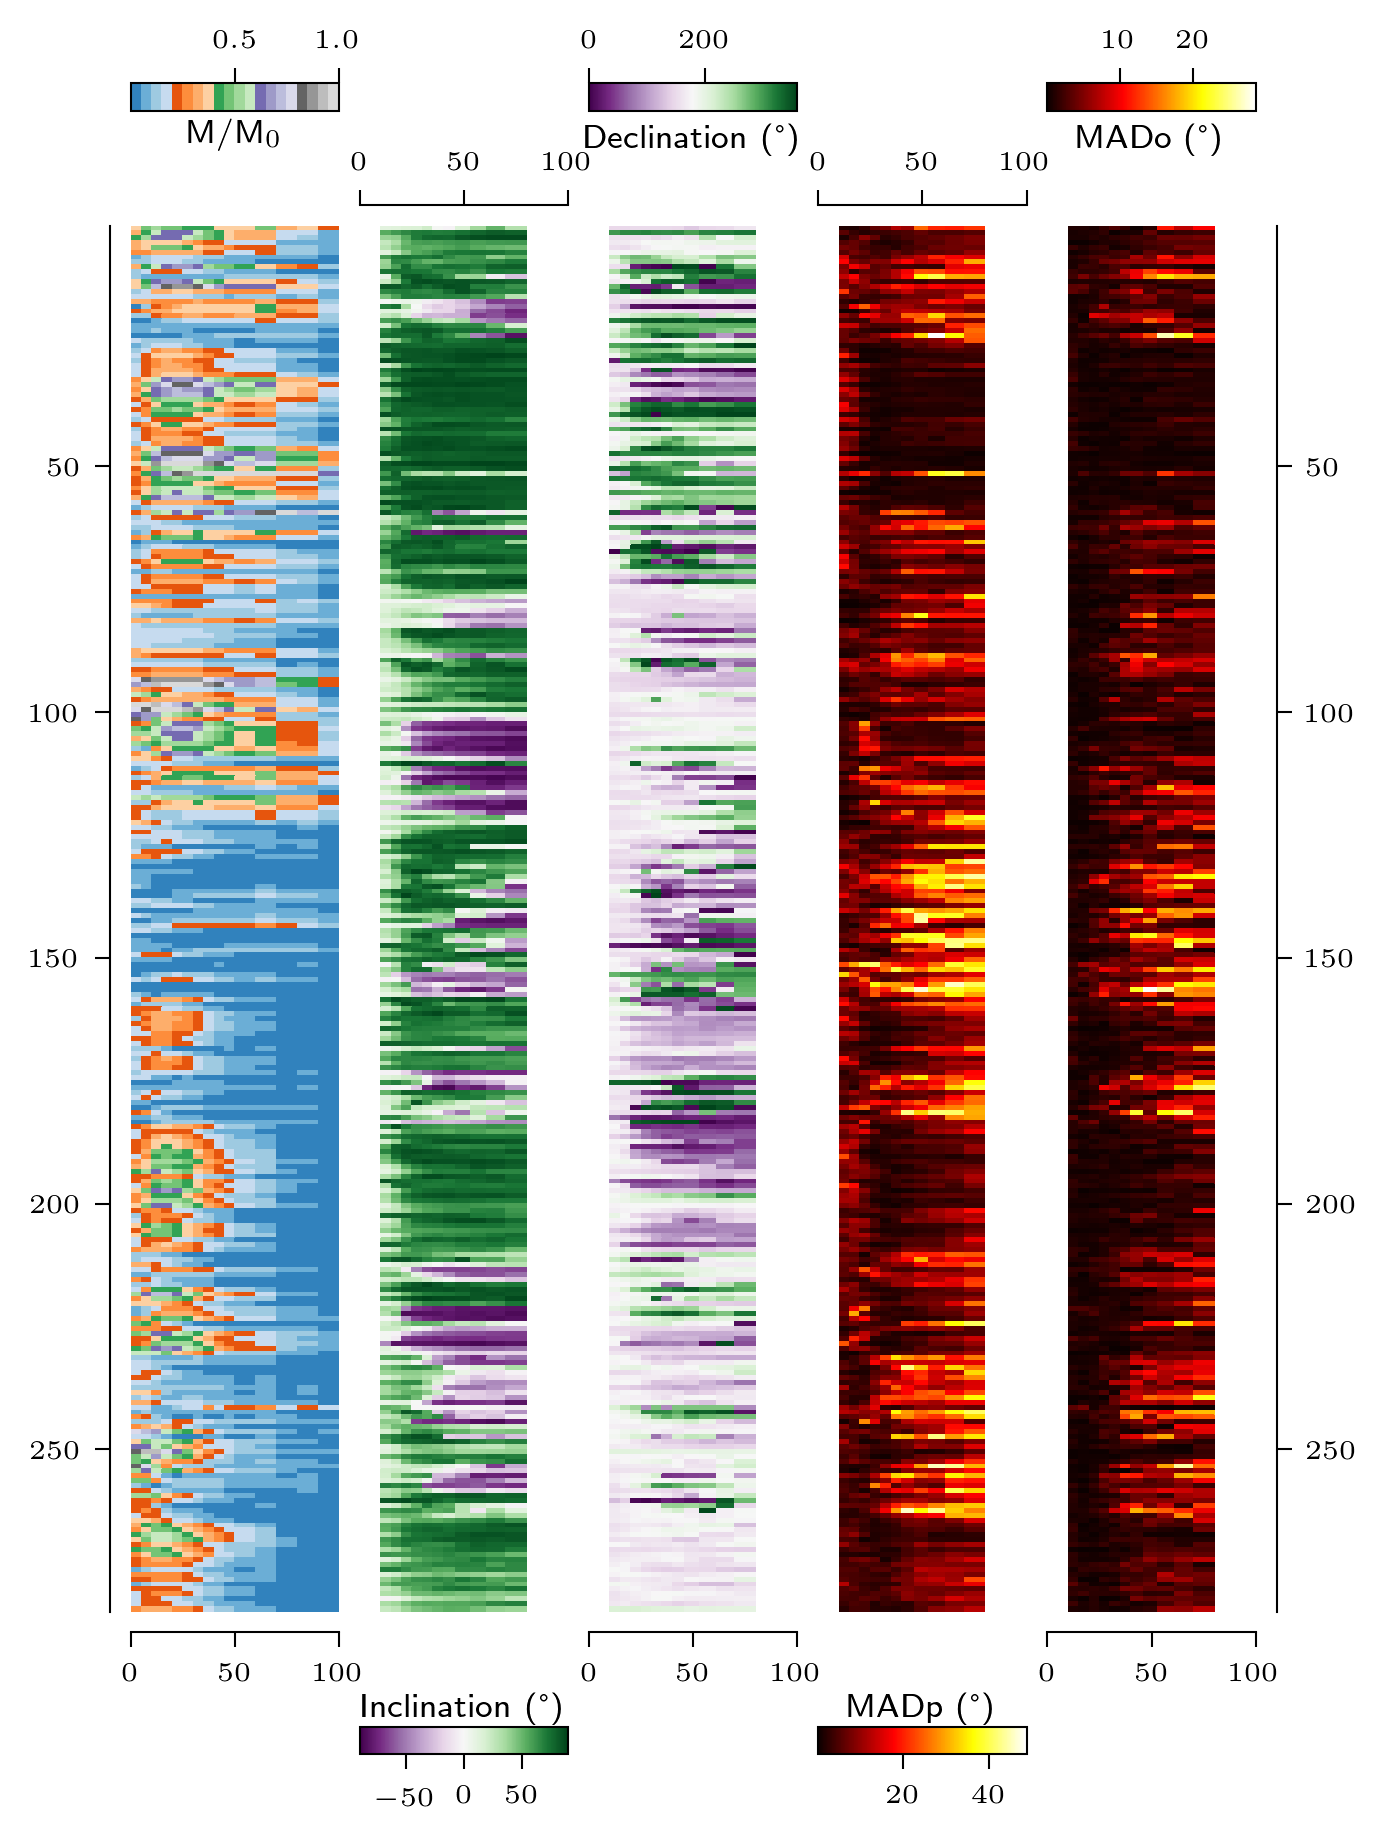

In [38]:
mesh_plot(
    "./testdata/PCA_Mesh.png",
    pca_mesh,
    save = True,
)